In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5

In [ ]:
download_dir = './ag_petfinder_tutorial'
zip_file = 'https://automl-mm-bench.s3.amazonaws.com/petfinder_kaggle.zip'

In [ ]:
from autogluon.core.utils.loaders import load_zip
load_zip.unzip(zip_file, unzip_dir=download_dir)

100%|██████████| 2.00G/2.00G [01:12<00:00, 27.5MiB/s]


In [ ]:
import os
os.listdir(download_dir) # specifying directory

['file.zip', 'petfinder_processed']

In [ ]:
dataset_path = download_dir + '/petfinder_processed'
os.listdir(dataset_path)

In [ ]:
dataset_path = download_dir + '/petfinder_processed'
os.listdir(dataset_path)

['train.csv', 'dev.csv', 'train_images', 'test.csv', 'test_images']

In [ ]:
os.listdir(dataset_path + '/train_images')[:10]

['087804d85-2.jpg',
 'b88f141d5-1.jpg',
 '258667857-3.jpg',
 'b1db9573c-1.jpg',
 '3b4ac67f0-2.jpg',
 'bb61d1c46-5.jpg',
 '39366118c-1.jpg',
 'acb614bba-9.jpg',
 '96477b249-4.jpg',
 '16c53ebf9-3.jpg']

In [ ]:
import pandas as pd

train_data = pd.read_csv(f'{dataset_path}/train.csv', index_col=0)
test_data = pd.read_csv(f'{dataset_path}/dev.csv', index_col=0)

In [ ]:
train_data.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Images
10721,1,Elbi,2,307,307,2,5,0,0,3,...,1,0,41336,e9a86209c54f589ba72c345364cf01aa,0,I'm looking for people to adopt my dog,e4b90955c,4.0,4,train_images/e4b90955c-1.jpg;train_images/e4b9...
13114,2,Darling,4,266,0,1,1,0,0,2,...,1,0,41401,01f954cdf61526daf3fbeb8a074be742,0,Darling was born at the back lane of Jalan Alo...,a0c1384d1,5.0,3,train_images/a0c1384d1-1.jpg;train_images/a0c1...
13194,1,Wolf,3,307,0,1,1,2,0,2,...,1,0,41332,6e19409f2847326ce3b6d0cec7e42f81,0,I found Wolf about a month ago stuck in a drai...,cf357f057,7.0,4,train_images/cf357f057-1.jpg;train_images/cf35...


In [ ]:
test_data.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Images
4331,2,Shin Wa,30,266,0,2,1,6,0,1,...,1,0,41401,ee2747ce26468ec44c7194e7d1d9dad9,0,"Shin Wa is a shy cat, she likes to hide so tha...",975d32d75,4.0,4,train_images/975d32d75-1.jpg;train_images/975d...
6114,1,NaN,1,307,307,1,1,2,7,1,...,3,0,41326,4354dd73f61d288d93219b026725ec3b,0,hey guys a couple of days back i rescued a lit...,2c8e65887,5.0,4,train_images/2c8e65887-1.jpg;train_images/2c8e...
11133,2,Caramel And Babies,3,266,0,3,2,5,0,1,...,4,0,41326,cdf3d43000aa26a8d510e149070a6fba,0,Mother was abandoned while pregnant. A friend ...,bb78d1aa5,1.0,3,train_images/bb78d1aa5-1.jpg


In [ ]:
label = 'AdoptionSpeed'
image_col = 'Images'

In [ ]:
train_data[image_col].iloc[0]

'train_images/e4b90955c-1.jpg;train_images/e4b90955c-2.jpg;train_images/e4b90955c-3.jpg;train_images/e4b90955c-4.jpg'

In [ ]:
train_data[image_col] = train_data[image_col].apply(lambda ele: ele.split(';')[0])
test_data[image_col] = test_data[image_col].apply(lambda ele: ele.split(';')[0])

train_data[image_col].iloc[0]

'train_images/e4b90955c-1.jpg'

In [ ]:
def path_expander(path, base_folder):
    path_l = path.split(';')
    return ';'.join([os.path.abspath(os.path.join(base_folder, path)) for path in path_l])

train_data[image_col] = train_data[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))
test_data[image_col] = test_data[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))

train_data[image_col].iloc[0]

'/content/ag_petfinder_tutorial/petfinder_processed/train_images/e4b90955c-1.jpg'

In [ ]:
train_data.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Images
10721,1,Elbi,2,307,307,2,5,0,0,3,...,1,0,41336,e9a86209c54f589ba72c345364cf01aa,0,I'm looking for people to adopt my dog,e4b90955c,4.0,4,/content/ag_petfinder_tutorial/petfinder_proce...
13114,2,Darling,4,266,0,1,1,0,0,2,...,1,0,41401,01f954cdf61526daf3fbeb8a074be742,0,Darling was born at the back lane of Jalan Alo...,a0c1384d1,5.0,3,/content/ag_petfinder_tutorial/petfinder_proce...
13194,1,Wolf,3,307,0,1,1,2,0,2,...,1,0,41332,6e19409f2847326ce3b6d0cec7e42f81,0,I found Wolf about a month ago stuck in a drai...,cf357f057,7.0,4,/content/ag_petfinder_tutorial/petfinder_proce...


In [ ]:
example_row = train_data.iloc[1]

example_row

Type                                                             2
Name                                                       Darling
Age                                                              4
Breed1                                                         266
Breed2                                                           0
Gender                                                           1
Color1                                                           1
Color2                                                           0
Color3                                                           0
MaturitySize                                                     2
FurLength                                                        1
Vaccinated                                                       2
Dewormed                                                         2
Sterilized                                                       2
Health                                                        

In [ ]:
example_row['Description']

'Darling was born at the back lane of Jalan Alor and was foster by a feeder. All his siblings had died of accident. His mother and grandmother had just been spayed. Darling make a great condo/apartment cat. He love to play a lot. He would make a great companion for someone looking for a cat to love.'

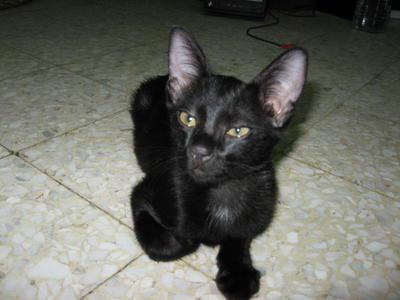

In [ ]:
example_image = example_row['Images']

from IPython.display import Image, display
pil_img = Image(filename=example_image)
display(pil_img)

In [ ]:
train_data = train_data.sample(500, random_state=0)

In [ ]:
from autogluon.tabular import FeatureMetadata
feature_metadata = FeatureMetadata.from_df(train_data)

print(feature_metadata)

('float', [])        :  1 | ['PhotoAmt']
('int', [])          : 19 | ['Type', 'Age', 'Breed1', 'Breed2', 'Gender', ...]
('object', [])       :  4 | ['Name', 'RescuerID', 'PetID', 'Images']
('object', ['text']) :  1 | ['Description']


In [ ]:
feature_metadata = feature_metadata.add_special_types({image_col: ['image_path']})

print(feature_metadata)

('float', [])              :  1 | ['PhotoAmt']
('int', [])                : 19 | ['Type', 'Age', 'Breed1', 'Breed2', 'Gender', ...]
('object', [])             :  3 | ['Name', 'RescuerID', 'PetID']
('object', ['image_path']) :  1 | ['Images']
('object', ['text'])       :  1 | ['Description']


In [ ]:
from autogluon.tabular.configs.hyperparameter_configs import get_hyperparameter_config
hyperparameters = get_hyperparameter_config('multimodal')

hyperparameters

{'NN_TORCH': {},
 'GBM': [{},
  {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
  'GBMLarge'],
 'CAT': {},
 'XGB': {},
 'AG_AUTOMM': {},
 'VW': {}}

In [ ]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label=label).fit(
    train_data=train_data,
    hyperparameters=hyperparameters,
    feature_metadata=feature_metadata,
    time_limit=900,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240915_005424"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.17 GB / 12.67 GB (88.1%)
Disk Space Avail:   77.37 GB / 112.64 GB (68.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/395M [00:00<?, ?B/s]

INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name              | Type                | Params | Mode 
------------------------------------------------------------------
0 | model             | MultimodalFusionMLP | 207 M  | train
1 | validation_metric | MulticlassAccuracy  | 0      | train
2 | loss_func         | CrossEntropyLoss    | 0      | train
------------------------------------------------------------------
207 M     Trainable params
0         Non-trainable params
207 M     Total params
828.189   Total estimated model params size (MB)
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
INFO: Epoch 0, global

In [ ]:
test_data[image_col].iloc[0]

'/content/ag_petfinder_tutorial/petfinder_processed/train_images/975d32d75-1.jpg'

In [ ]:
predictor.leaderboard(test_data)

Load pretrained checkpoint: /content/AutogluonModels/ag-20240915_005424/models/MultiModalPredictor/automm_model/model.ckpt
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Predicting: |          | 0/? [00:00<?, ?it/s]

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.327442,0.31,accuracy,0.054714,0.013278,8.417593,0.054714,0.013278,8.417593,1,True,3
1,LightGBMLarge,0.323775,0.37,accuracy,0.070224,0.005130,3.022738,0.070224,0.005130,3.022738,1,True,6
2,WeightedEnsemble_L2,0.323775,0.37,accuracy,0.074931,0.006211,3.190502,0.004707,0.001081,0.167764,2,True,8
3,LightGBMXT,0.315772,0.34,accuracy,0.217492,0.006856,0.791610,0.217492,0.006856,0.791610,1,True,2
4,NeuralNetTorch,0.306435,0.33,accuracy,0.095184,0.027661,6.235157,0.095184,0.027661,6.235157,1,True,5
5,XGBoost,0.292431,0.35,accuracy,0.150738,0.015965,1.403196,0.150738,0.015965,1.403196,1,True,4
6,LightGBM,0.289763,0.34,accuracy,0.016374,0.005219,3.807795,0.016374,0.005219,3.807795,1,True,1
7,MultiModalPredictor,0.287763,0.32,accuracy,59.810820,4.481857,1064.430106,59.810820,4.481857,1064.430106,1,True,7


In [ ]:
predictor.feature_importance()